In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading cleaned file
df =  pd.read_csv('../data/Milestone_2_cleaned_files/life_expectancy_all.csv')

In [3]:
df.head()

,State,HSGradPer,BADegPer,AdvDegPer,LifeExp2018,LifeExp2010,MaleLifeExp,FemLifeExp,PopTot,MurderNMTot,...,Income2013,Income2012,Income2011,Income2010,Income2009,Income2008,Income2007,Abb,Region,Division
0,Alabama,85.3,24.5,9.1,75.4,75.4,72.6,78.1,4853875,348,...,42849,41574,41415,40474,40489,42666,40554,AL,South,East South Central
1,Alaska,92.4,29.0,10.4,78.8,78.0,76.7,81.2,737709,59,...,72237,67712,67825,64576,66953,68460,64333,AK,West,Pacific
2,Arizona,82.1,28.4,10.7,79.9,79.3,77.5,82.3,6817565,306,...,48510,47826,46709,46789,48745,50958,49889,AZ,West,Mountain
3,Arkansas,85.6,22.0,7.9,75.9,76.0,73.1,78.6,2977853,181,...,39376,39018,41302,38587,36538,39586,38134,AR,South,West South Central
4,California,82.5,32.6,12.2,81.6,80.6,79.4,83.8,38993940,1861,...,60190,58328,57287,57708,58931,61021,59948,CA,West,Pacific


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          50 non-null     object 
 1   HSGradPer      50 non-null     float64
 2   BADegPer       50 non-null     float64
 3   AdvDegPer      50 non-null     float64
 4   LifeExp2018    50 non-null     float64
 5   LifeExp2010    50 non-null     float64
 6   MaleLifeExp    50 non-null     float64
 7   FemLifeExp     50 non-null     float64
 8   PopTot         50 non-null     int64  
 9   MurderNMTot    50 non-null     int64  
 10  MurderTot      48 non-null     float64
 11  GunMurderTot   48 non-null     float64
 12  GunOwnPer      50 non-null     float64
 13  MurderNMRate   50 non-null     float64
 14  MurderRate     48 non-null     float64
 15  GunMurderRate  48 non-null     float64
 16  TotalSqMi      50 non-null     float64
 17  TotalKmQ       50 non-null     int64  
 18  LandSqMi    

### Using annotated heatmap to show Correlation between variables

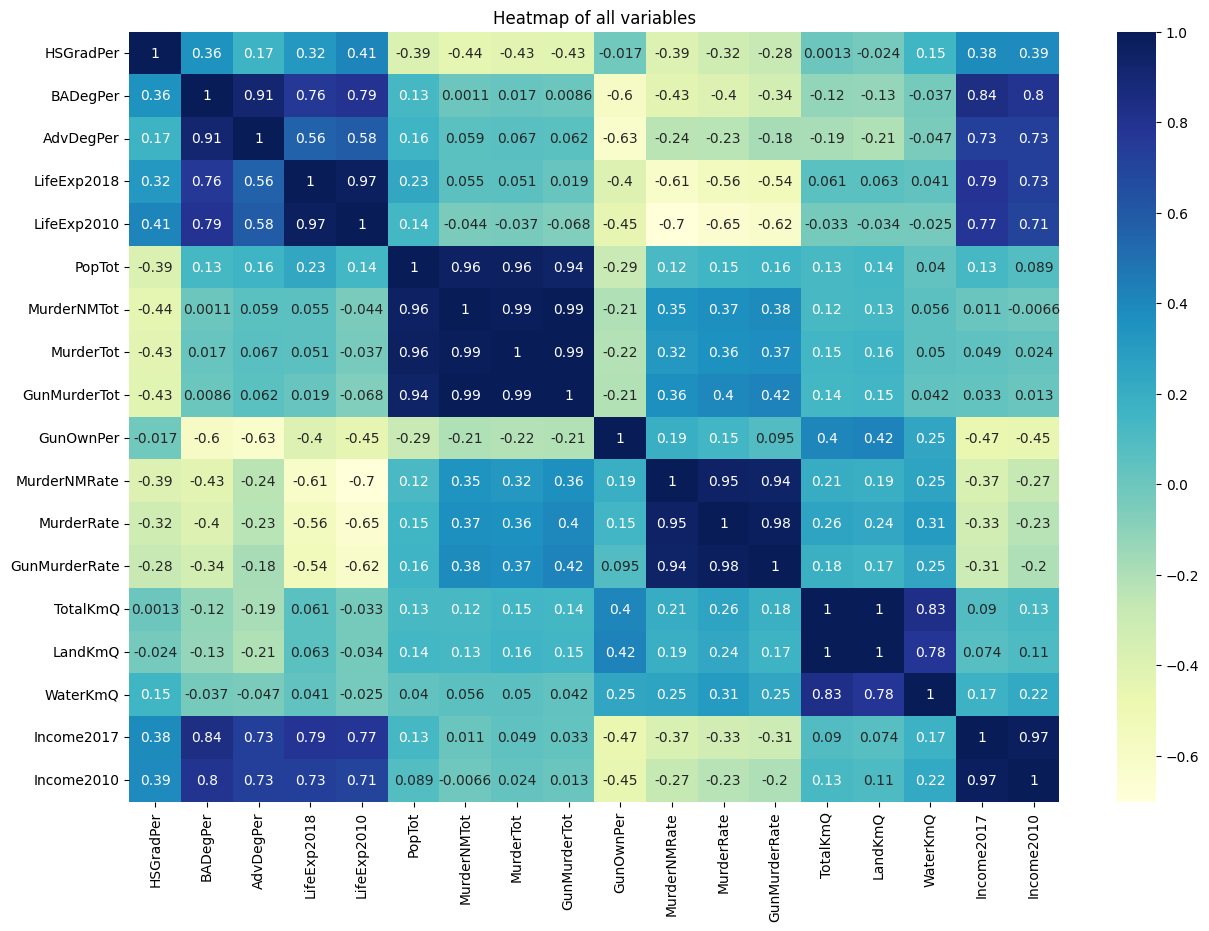

In [5]:
# Dropping the less relevant columns to improve readability and analysis
df_reduced = df.drop(columns = ["Income2007","Income2008","Income2009","Income2011","Income2012",
                             "Income2013","Income2014","Income2015","Income2016","MaleLifeExp","FemLifeExp",
                            "TotalSqMi","LandSqMi","WaterSqMi","LandPer","WaterPer"])

fig, ax = plt.subplots(figsize=(15, 10))
corr = df_reduced.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values, 
            yticklabels = corr.columns.values, 
            annot = True, 
            ax=ax,
            cmap="YlGnBu");
ax.set_title("Heatmap of all variables")
plt.show()

### Relation of Life Expectancy with Murder variables

<Figure size 1500x1500 with 0 Axes>

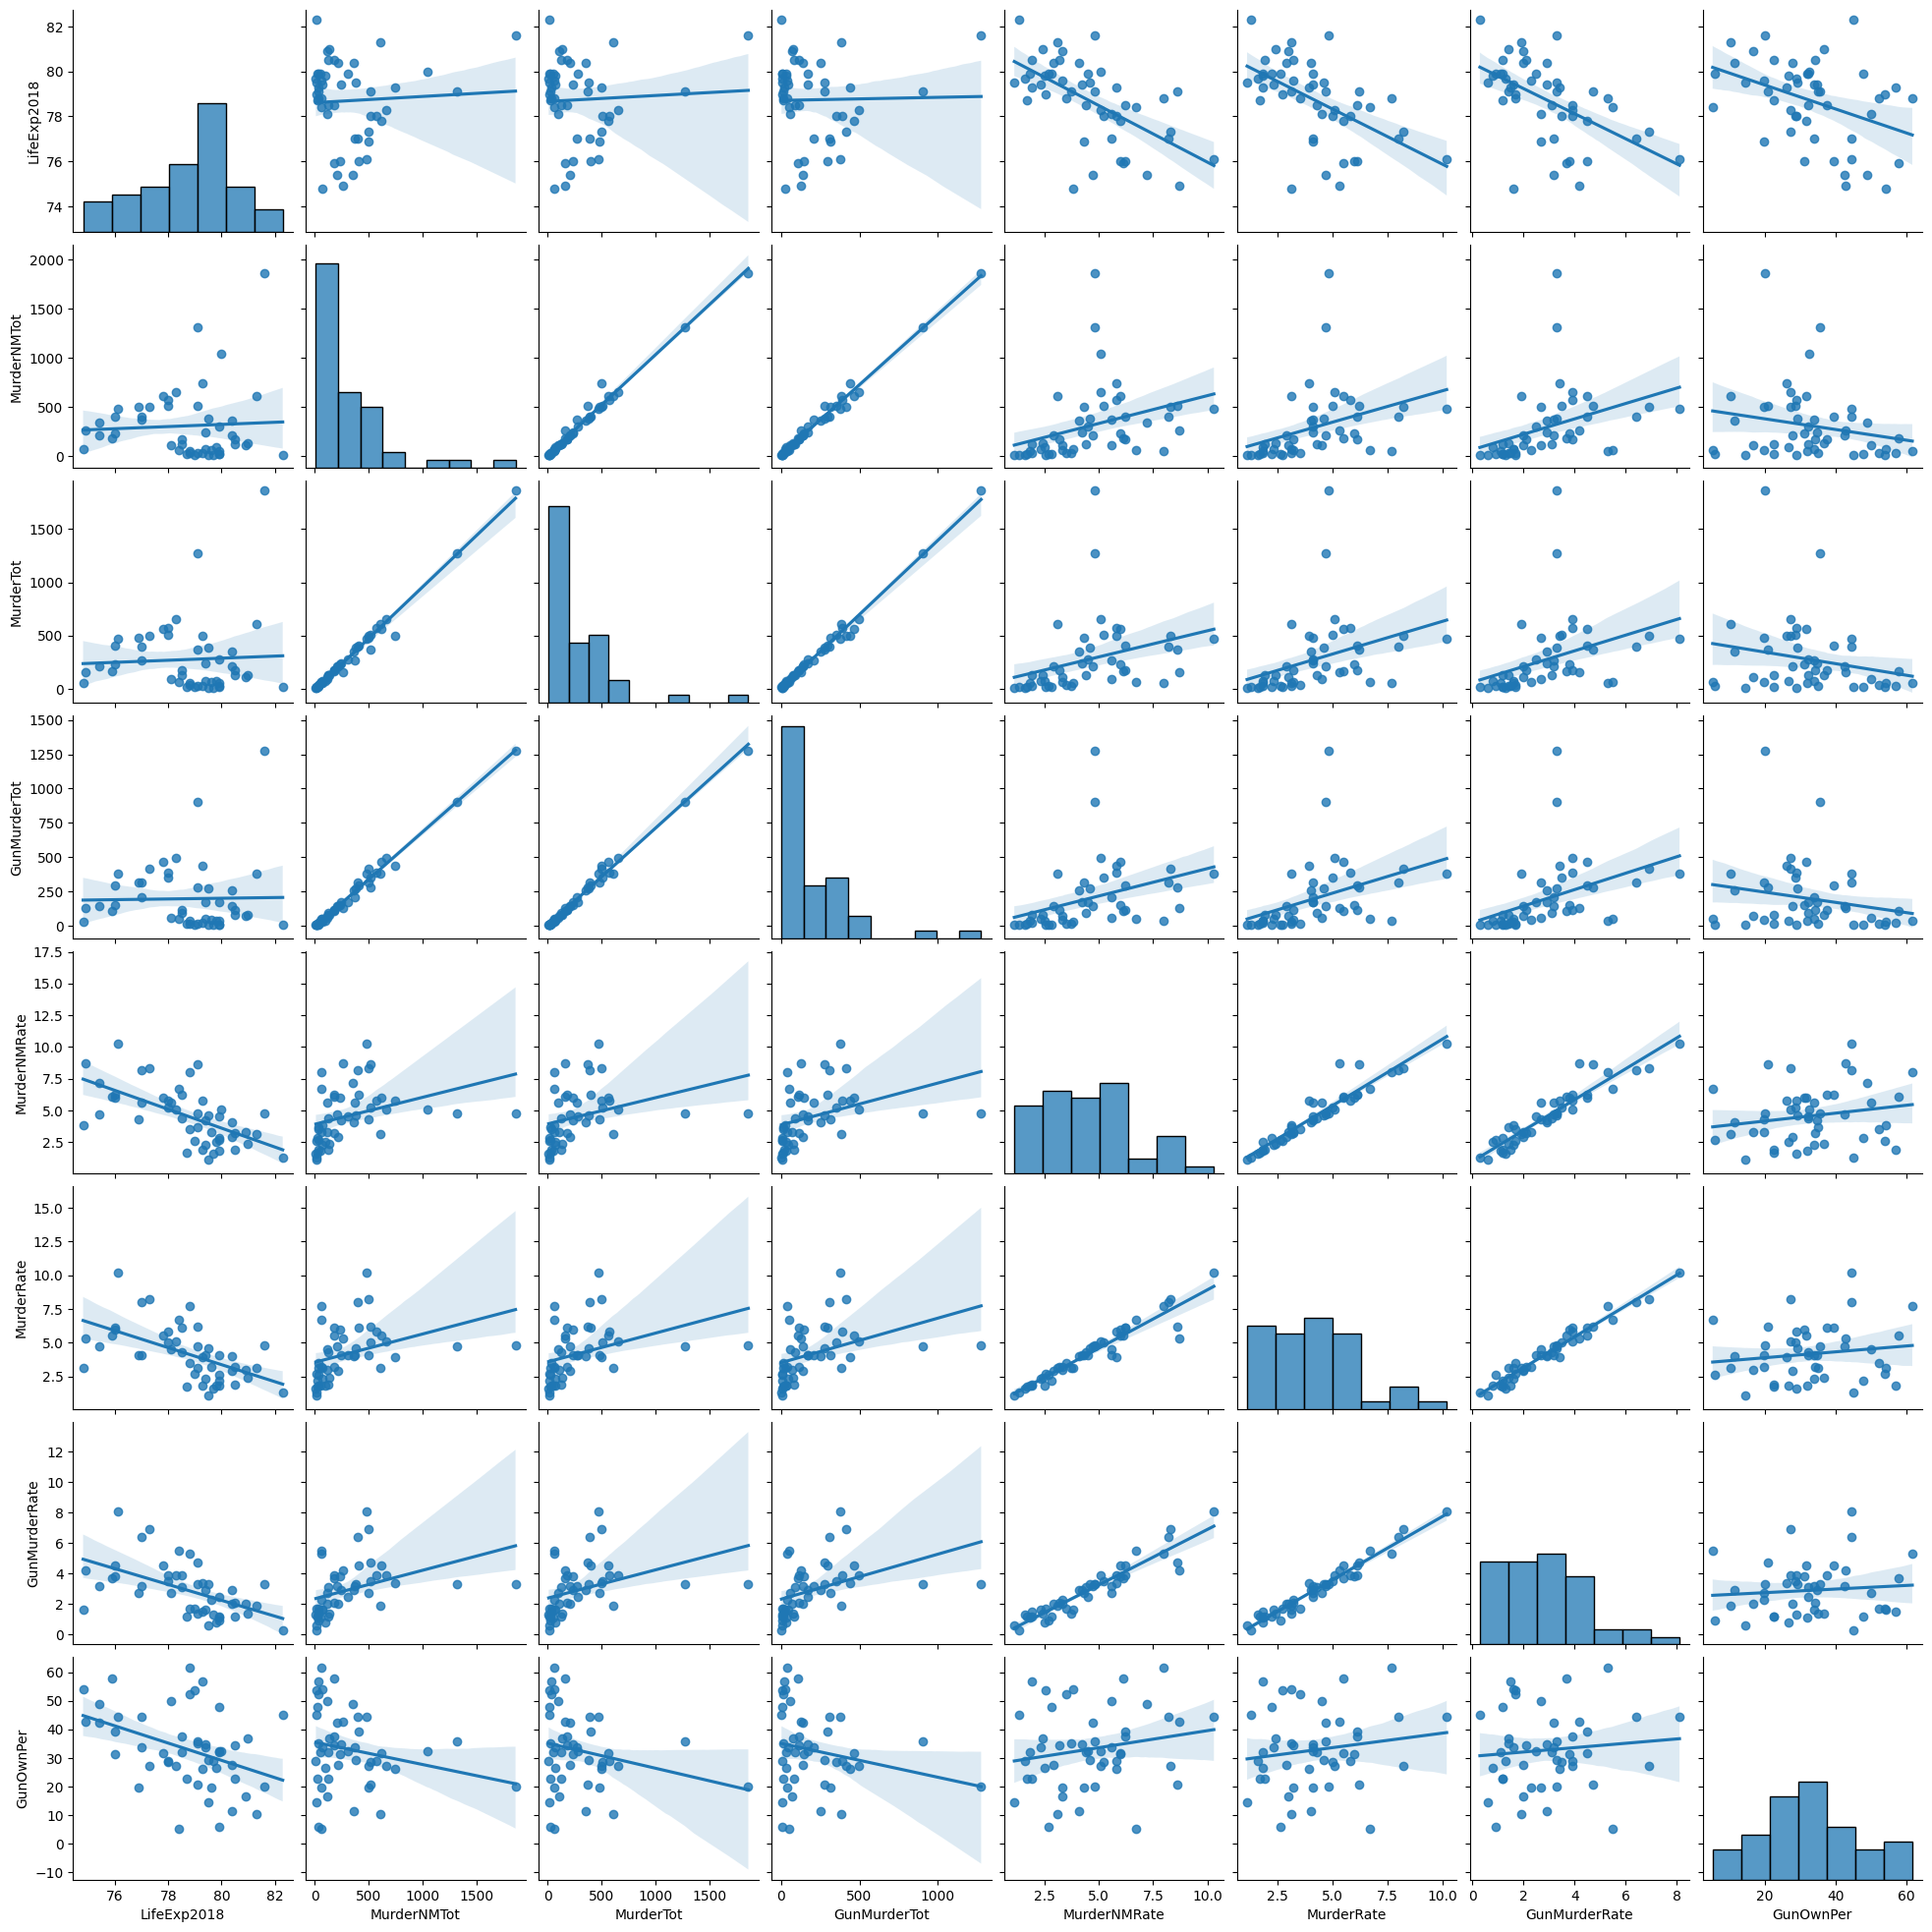

In [6]:
plt.figure(figsize=(15,15))
murder_cols = (df_reduced.filter(like='Murder').columns).to_list()
sns.pairplot(df[["LifeExp2018"]+murder_cols+["GunOwnPer"]], kind = "reg")
plt.show()

### Relation of Life Expectancy with Population, Education, Income, Area variables

<Figure size 1500x1500 with 0 Axes>

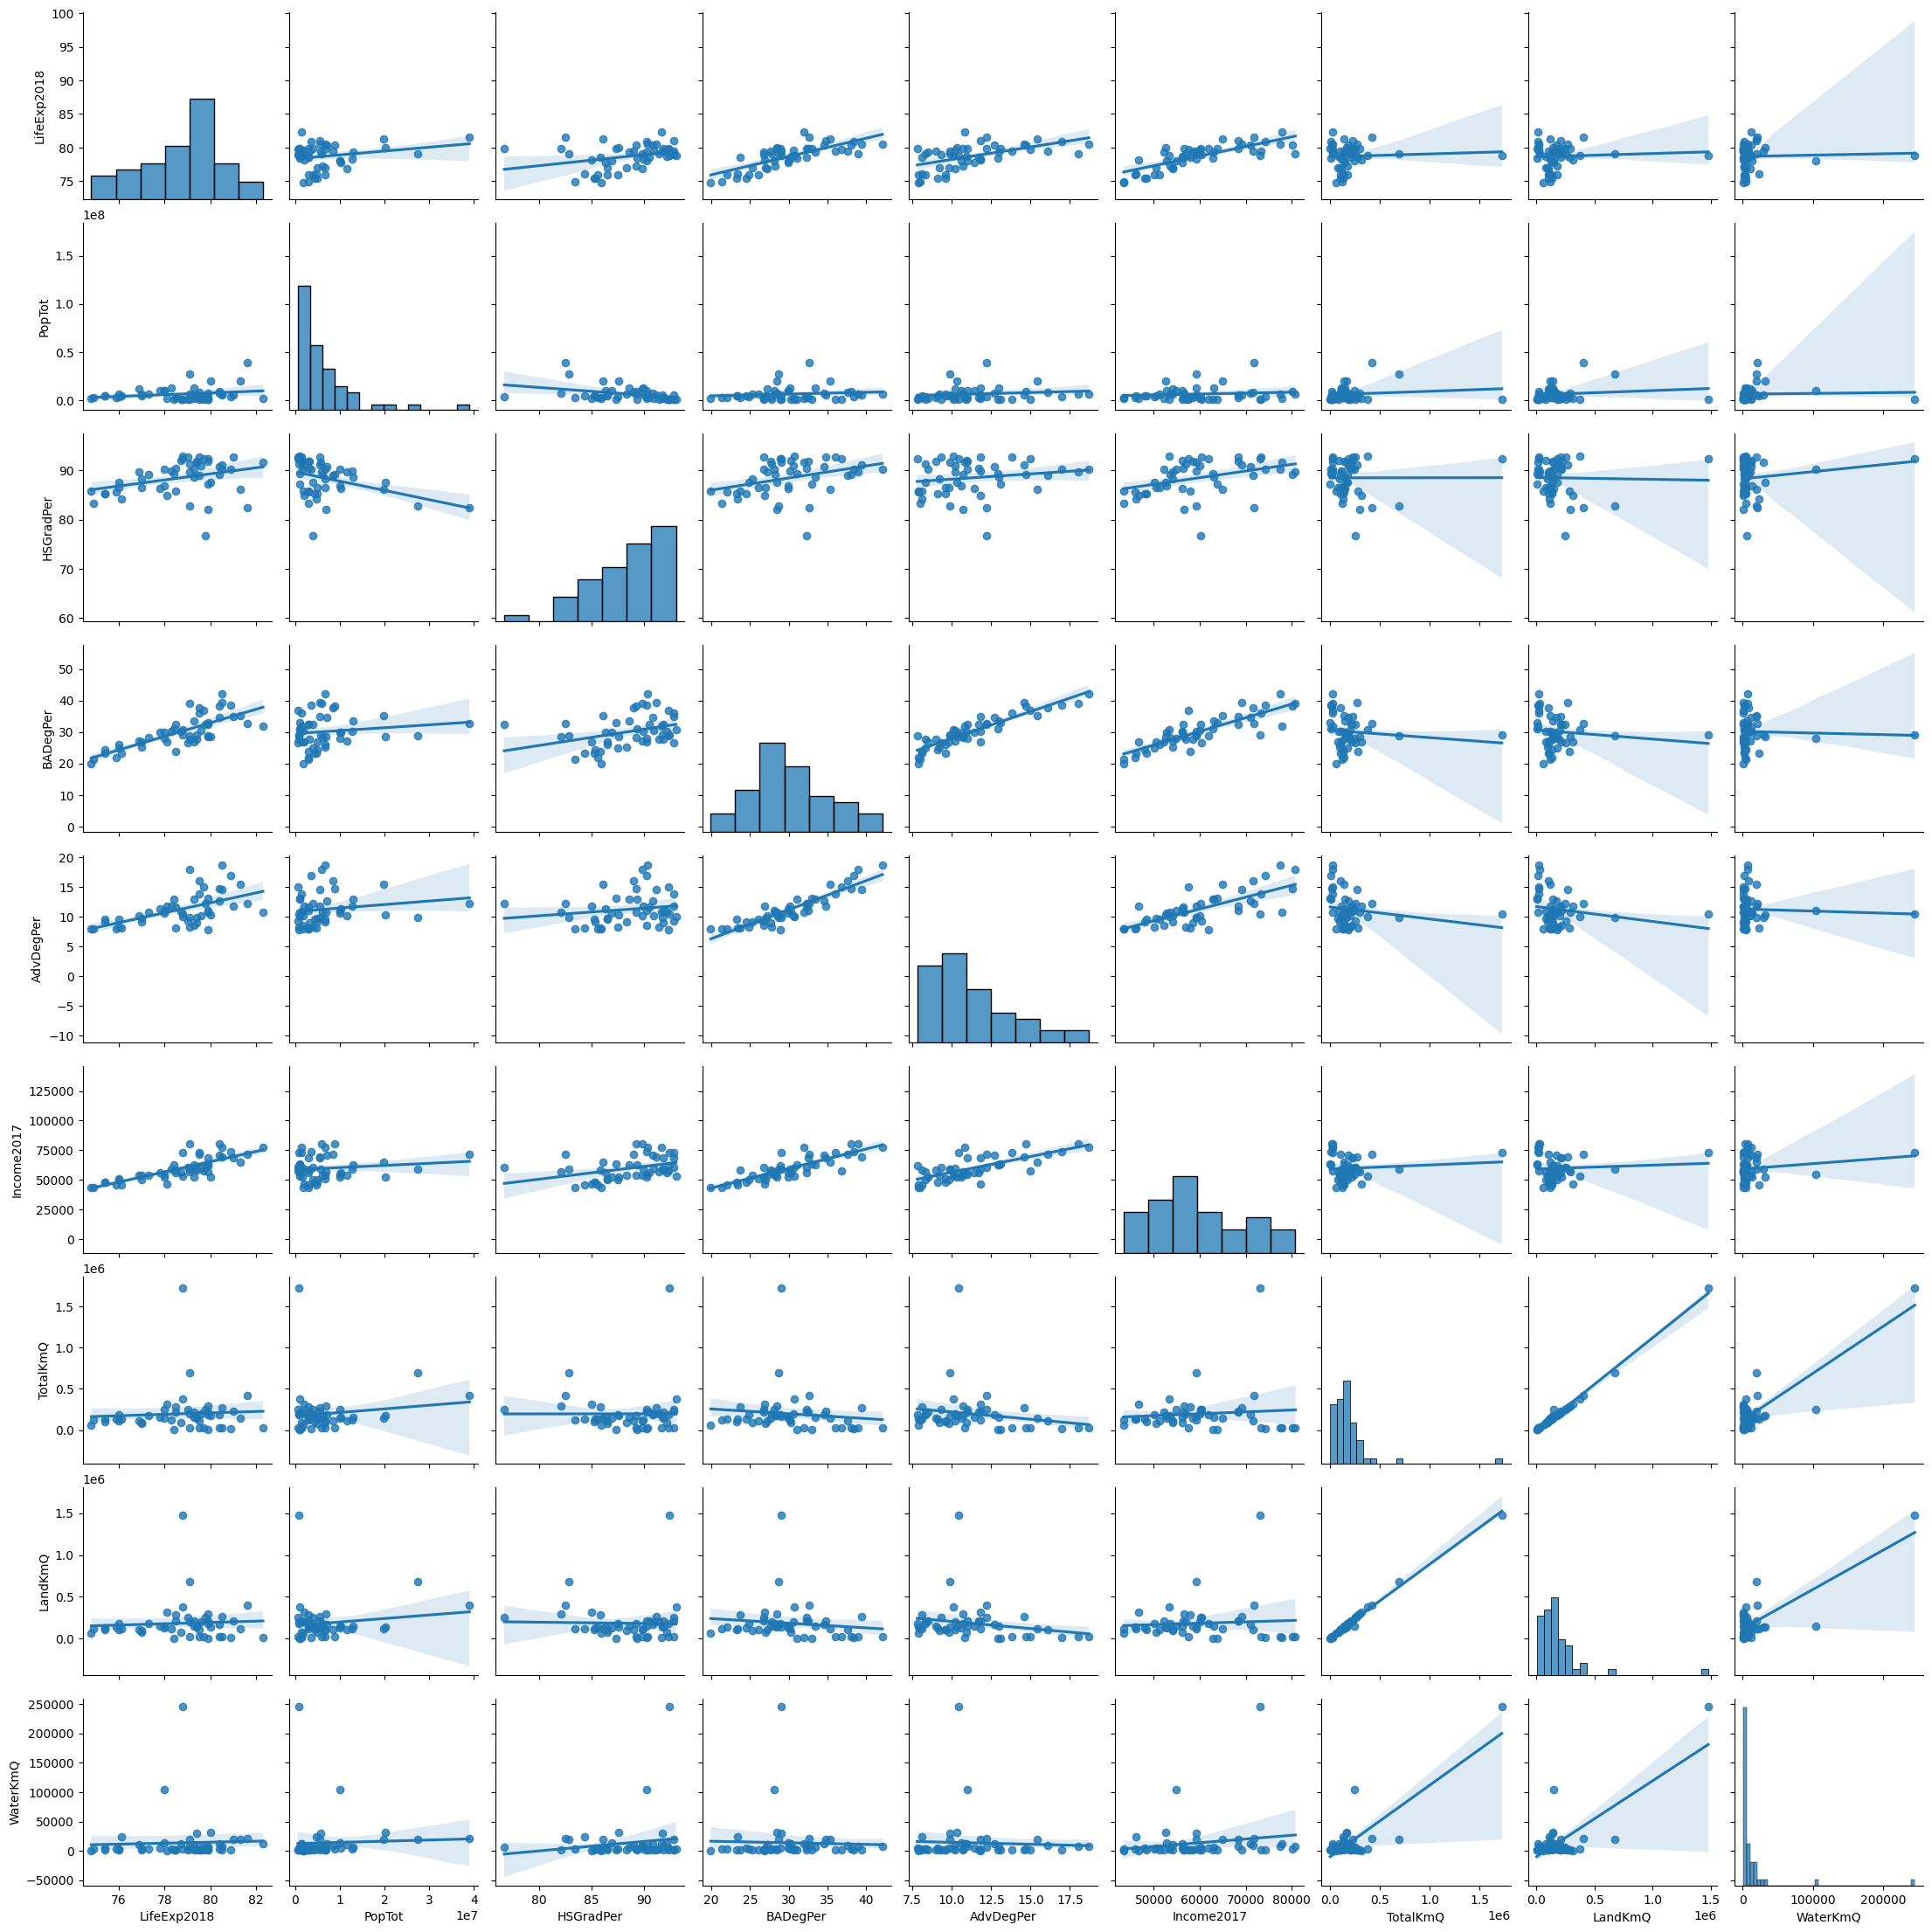

In [7]:
plt.figure(figsize=(15,15))
sns.pairplot(df[["LifeExp2018","PopTot","HSGradPer","BADegPer","AdvDegPer","Income2017",
                 "TotalKmQ","LandKmQ","WaterKmQ"]], kind = "reg")
plt.show()

### How does the level of education relate to life expectancy and income?

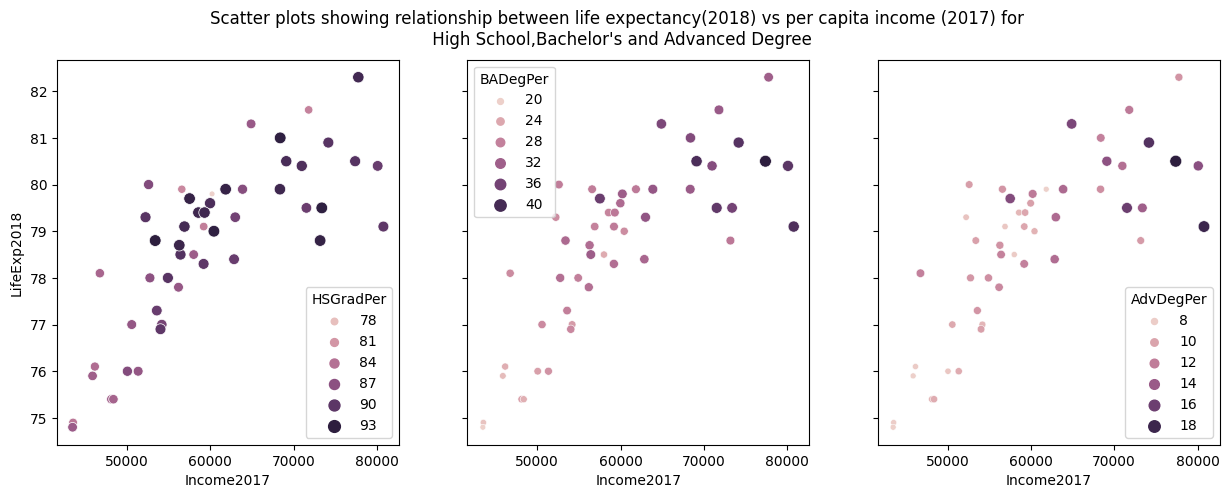

In [8]:
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharey=True)
fig.suptitle('Scatter plots showing relationship between life expectancy(2018) vs per capita income (2017) for \n High School,Bachelor\'s and Advanced Degree')
sns.scatterplot(ax=axes[0], data=df, x="Income2017", y="LifeExp2018", hue="HSGradPer", size = "HSGradPer");
sns.scatterplot(ax=axes[1], data=df, x="Income2017", y="LifeExp2018", hue="BADegPer", size = "BADegPer");
sns.scatterplot(ax=axes[2], data=df, x="Income2017", y="LifeExp2018", hue="AdvDegPer", size = "AdvDegPer");
plt.show()